<a href="https://colab.research.google.com/github/Rupneetk/DataViz/blob/master/Caltrian_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
ridshp_daily=pd.read_csv('ridshp_Daily.csv')
ridshp_daily.head()

,Origin_ID,Origin_Name,Dest_ID,Dest_Name,Ridership_2017_observed,Ridership_2022_diesel,Ridership_2022_PCEP,Ridership_2029_PCEP_noTransbay,Ridership_2029_PCEP,Ridership_2029_HSR1,Ridership_2033_HSR1,Ridership_2033_HSR2,Ridership_2040_HSR2,Ridership_2040_moderate,Ridership_2040_high
0,1,Transbay,1,Transbay,0,0,0,0,0,0,0,0,0,0,0
1,2,4th and King,1,Transbay,0,0,0,0,330,867,978,913,1111,1539,1693
2,4,22nd St,1,Transbay,0,0,0,0,128,260,289,266,323,853,634
3,7,Bayshore,1,Transbay,0,0,0,0,113,173,198,184,226,219,209
4,8,South San Francisco,1,Transbay,0,0,0,0,367,312,346,335,405,1102,1040


In [0]:
ridshp_daily_2017=ridshp_daily[[ 'Origin_Name','Dest_Name',
       'Ridership_2017_observed']]
ridshp_daily_2017.head()

,Origin_Name,Dest_Name,Ridership_2017_observed
0,Transbay,Transbay,0
1,4th and King,Transbay,0
2,22nd St,Transbay,0
3,Bayshore,Transbay,0
4,South San Francisco,Transbay,0


In [0]:
# converting string into integer 
ridshp_daily_2017['Ridership_2017_observed'] = ridshp_daily_2017['Ridership_2017_observed'].fillna(0.0).str.replace(',', '').astype(int)
type(ridshp_daily_2017.Ridership_2017_observed[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


numpy.int64

In [0]:
r_d_2017_pivoted= ridshp_daily_2017.pivot(index='Origin_Name', columns='Dest_Name', values='Ridership_2017_observed')

In [0]:
r_d_2017_pivoted.head()

In [0]:
# removing redundant row and column in data 
r_d_2017_pivoted=r_d_2017_pivoted.drop(['Transbay'],axis=0)
r_d_2017_pivoted=r_d_2017_pivoted.drop(columns='Transbay')
r_d_2017_pivoted.head()

Dest_Name,22nd St,4th and King,Atherton,Bayshore,Belmont,Blossom Hill,Broadway,Burlingame,California Ave,Capitol,College Park,Gilroy,Hayward Park,Hillsdale,Lawrence,Menlo Park,Millbrae,Morgan Hill,Mountain View,Palo Alto,Redwood City,San Antonio,San Bruno,San Carlos,San Jose Diridon,San Martin,San Mateo,Santa Clara,South San Francisco,Sunnyvale,Tamien
Origin_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22nd St,0,26,0,0,4,0,0,46,53,0,0,0,22,56,23,41,10,0,316,643,145,38,6,33,67,0,68,39,9,40,2
4th and King,25,0,0,30,120,7,0,177,526,37,0,57,99,1306,275,541,454,29,1936,2163,1407,355,78,246,1844,15,665,304,96,1910,505
Atherton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bayshore,2,38,0,0,7,0,0,16,0,0,0,0,20,28,1,0,0,0,5,52,13,0,5,13,14,0,14,11,1,0,0
Belmont,4,212,0,1,0,0,0,14,4,0,0,0,1,0,1,10,63,0,0,102,36,18,10,6,52,0,14,26,8,19,0


In [0]:
#Re-arragning rows and column as per geographic location 
r_d_2017_pivoted=r_d_2017_pivoted.reindex([ '4th and King', '22nd St','Bayshore','South San Francisco','San Bruno',
                                           'Millbrae','Broadway','Burlingame','San Mateo','Hayward Park', 'Hillsdale','Belmont','San Carlos','Redwood City',
                                          'Atherton', 'Menlo Park', 'Palo Alto', 'California Ave', 'San Antonio', 'Mountain View','Sunnyvale',
                                           'Lawrence','Santa Clara','College Park','San Jose Diridon','Tamien',
                                           'Capitol', 'Blossom Hill', 
                                           'Morgan Hill', 'San Martin','Gilroy'])
r_d_2017_pivoted=r_d_2017_pivoted[[ '4th and King', '22nd St','Bayshore','South San Francisco','San Bruno',
                                           'Millbrae','Broadway','Burlingame','San Mateo','Hayward Park', 'Hillsdale','Belmont','San Carlos','Redwood City',
                                          'Atherton', 'Menlo Park', 'Palo Alto', 'California Ave', 'San Antonio', 'Mountain View','Sunnyvale',
                                           'Lawrence','Santa Clara','College Park','San Jose Diridon','Tamien',
                                           'Capitol', 'Blossom Hill', 
                                           'Morgan Hill', 'San Martin','Gilroy']]
r_d_2017_pivoted.head()                                      

Dest_Name,4th and King,22nd St,Bayshore,South San Francisco,San Bruno,Millbrae,Broadway,Burlingame,San Mateo,Hayward Park,Hillsdale,Belmont,San Carlos,Redwood City,Atherton,Menlo Park,Palo Alto,California Ave,San Antonio,Mountain View,Sunnyvale,Lawrence,Santa Clara,College Park,San Jose Diridon,Tamien,Capitol,Blossom Hill,Morgan Hill,San Martin,Gilroy
Origin_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4th and King,0,25,30,96,78,454,0,177,665,99,1306,120,246,1407,0,541,2163,526,355,1936,1910,275,304,0,1844,505,37,7,29,15,57
22nd St,26,0,0,9,6,10,0,46,68,22,56,4,33,145,0,41,643,53,38,316,40,23,39,0,67,2,0,0,0,0,0
Bayshore,38,2,0,1,5,0,0,16,14,20,28,7,13,13,0,0,52,0,0,5,0,1,11,0,14,0,0,0,0,0,0
South San Francisco,102,5,6,0,5,5,0,9,6,1,51,8,22,70,0,21,54,13,8,34,22,7,11,0,29,7,0,0,0,0,0
San Bruno,184,10,0,3,0,0,0,0,26,27,43,0,10,92,0,20,137,6,0,24,61,8,9,0,40,0,0,0,0,0,0


In [0]:
r_d_2017_pivoted=r_d_2017_pivoted.reset_index()
r_d_2017_pivoted.head()

Dest_Name,Origin_Name,4th and King,22nd St,Bayshore,South San Francisco,San Bruno,Millbrae,Broadway,Burlingame,San Mateo,Hayward Park,Hillsdale,Belmont,San Carlos,Redwood City,Atherton,Menlo Park,Palo Alto,California Ave,San Antonio,Mountain View,Sunnyvale,Lawrence,Santa Clara,College Park,San Jose Diridon,Tamien,Capitol,Blossom Hill,Morgan Hill,San Martin,Gilroy
0,4th and King,0,25,30,96,78,454,0,177,665,99,1306,120,246,1407,0,541,2163,526,355,1936,1910,275,304,0,1844,505,37,7,29,15,57
1,22nd St,26,0,0,9,6,10,0,46,68,22,56,4,33,145,0,41,643,53,38,316,40,23,39,0,67,2,0,0,0,0,0
2,Bayshore,38,2,0,1,5,0,0,16,14,20,28,7,13,13,0,0,52,0,0,5,0,1,11,0,14,0,0,0,0,0,0
3,South San Francisco,102,5,6,0,5,5,0,9,6,1,51,8,22,70,0,21,54,13,8,34,22,7,11,0,29,7,0,0,0,0,0
4,San Bruno,184,10,0,3,0,0,0,0,26,27,43,0,10,92,0,20,137,6,0,24,61,8,9,0,40,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
ridshp_daily_melted = r_d_2017_pivoted.melt(id_vars='Origin_Name')
ridshp_daily_melted.head()

,Origin_Name,Dest_Name,value
0,4th and King,4th and King,0
1,22nd St,4th and King,26
2,Bayshore,4th and King,38
3,South San Francisco,4th and King,102
4,San Bruno,4th and King,184


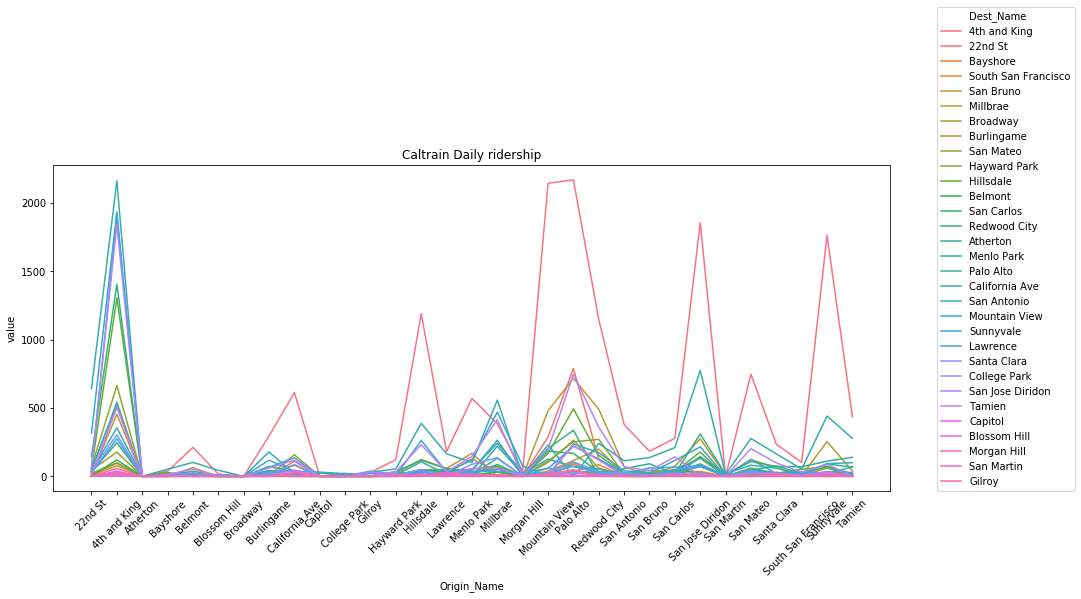

In [0]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Origin_Name', y='value', hue='Dest_Name', data= ridshp_daily_melted)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1.5))
plt.title('Caltrain Daily ridership')
plt.show()

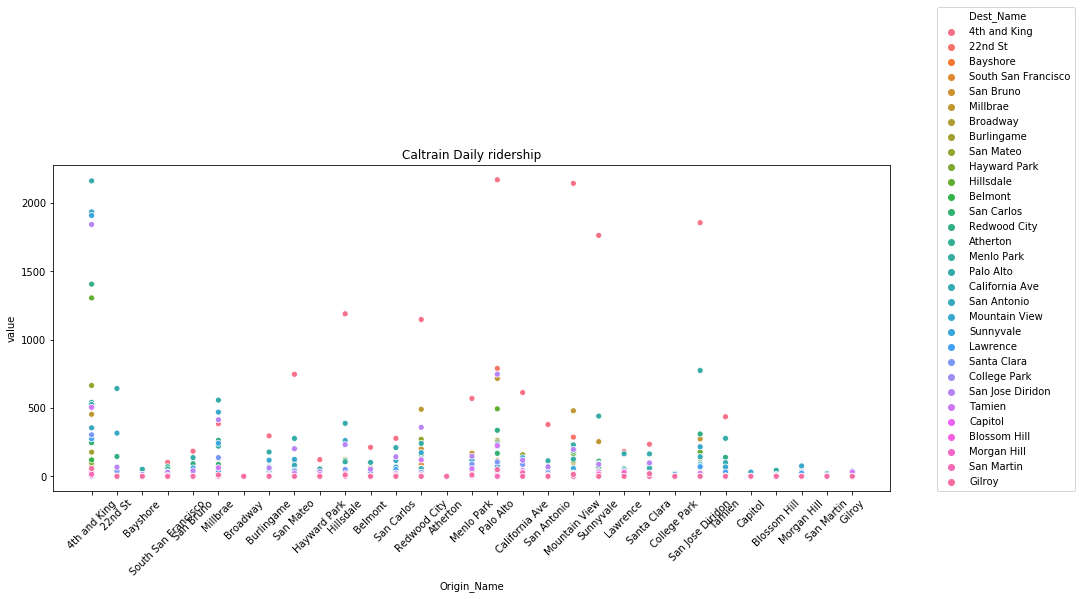

In [0]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Origin_Name', y='value', hue='Dest_Name', data= ridshp_daily_melted)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1.5))
plt.title('Caltrain Daily ridership')
plt.show()

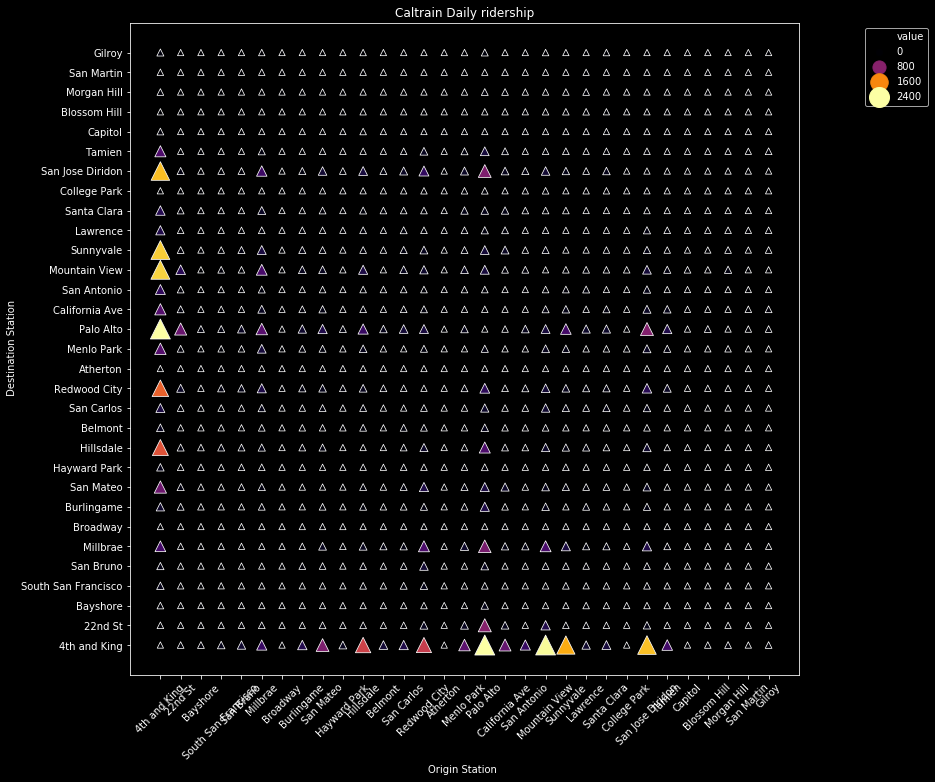

In [0]:
# palette='inferno'
plt.figure(figsize=(12,12))
sns.scatterplot(x='Origin_Name', size='value', y='Dest_Name',marker='^',sizes=(40, 400), hue='value', palette='inferno', data= ridshp_daily_melted)
plt.xticks(rotation=45)
plt.ylabel(" Destination Station")
plt.xlabel("Origin Station ")
plt.legend(['People'])
plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Caltrain Daily ridership')
plt.style.use('dark_background')
plt.show()

In [0]:
# some values are zero .. for log
np.seterr(divide = 'ignore') 
ridshp_daily_melted['Value_log']= np.log(ridshp_daily_melted.value)

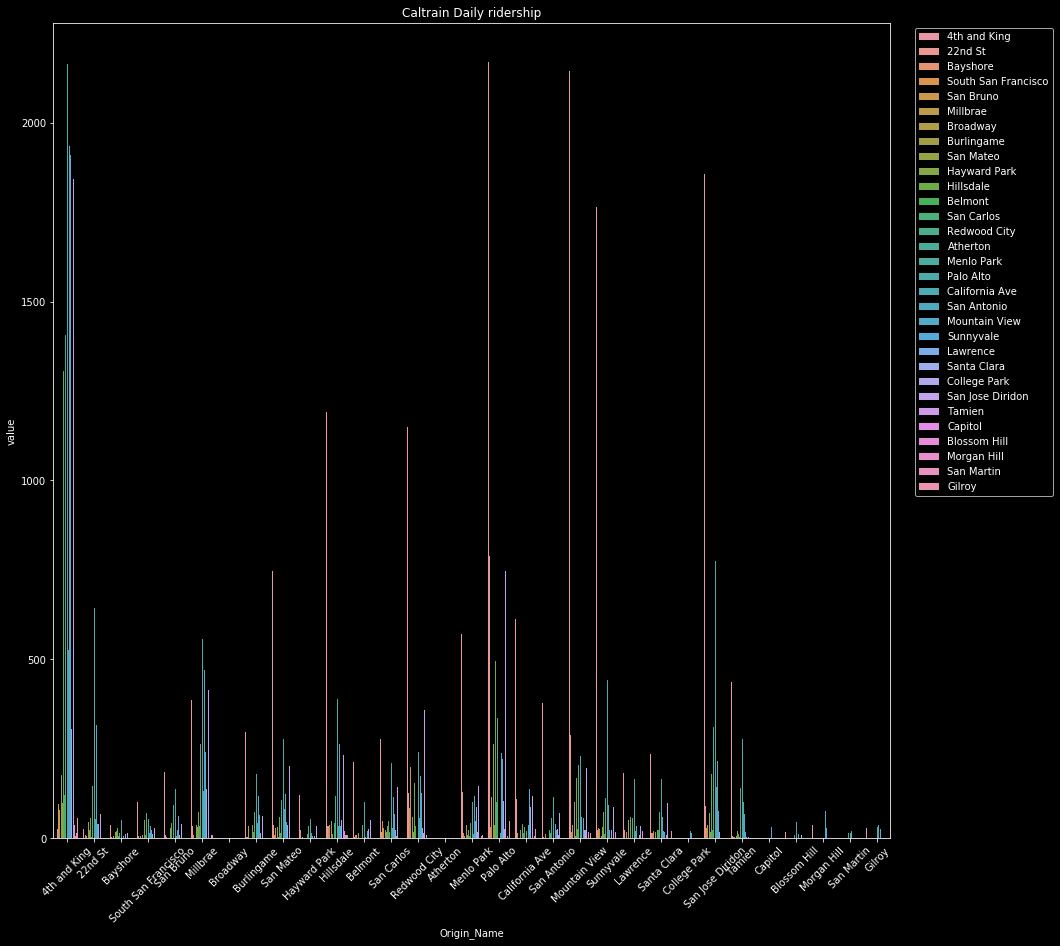

In [0]:
plt.figure(figsize=(15,15))
sns.barplot(x='Origin_Name', hue='Dest_Name', y='value', data=ridshp_daily_melted, order=None, hue_order=None)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.title('Caltrain Daily ridership')
plt.style.use('dark_background')
plt.show()